In [2]:
import numpy as np,seaborn as sns,tensorflow as tf,pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

In [3]:
df=pd.read_excel("/content/drive/MyDrive/merc.xlsx")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB
None


In [4]:
df.select_dtypes("object")


,transmission
0,Automatic
1,Automatic
2,Automatic
3,Automatic
4,Automatic
...,...
13114,Automatic
13115,Automatic
13116,Automatic
13117,Automatic


In [5]:
plt.figure(figsize=(20,20)) #sns.set(rc={"figure.figsize":(20,20)})

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

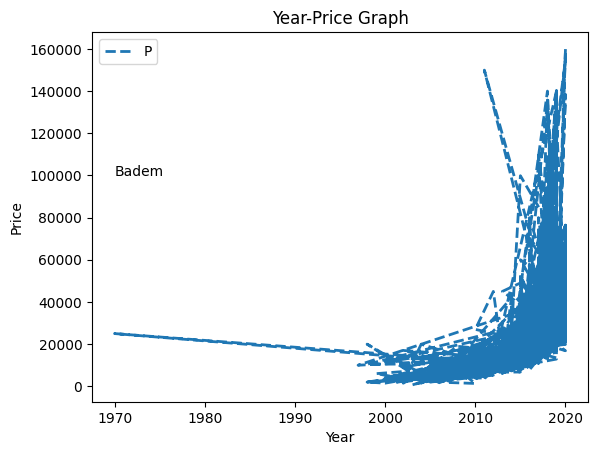

In [6]:
plt.plot(df["year"],df["price"],linewidth=2,linestyle="--")
plt.title("Year-Price Graph")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend("Price",loc=2)
plt.show()

<Axes: xlabel='year', ylabel='price'>

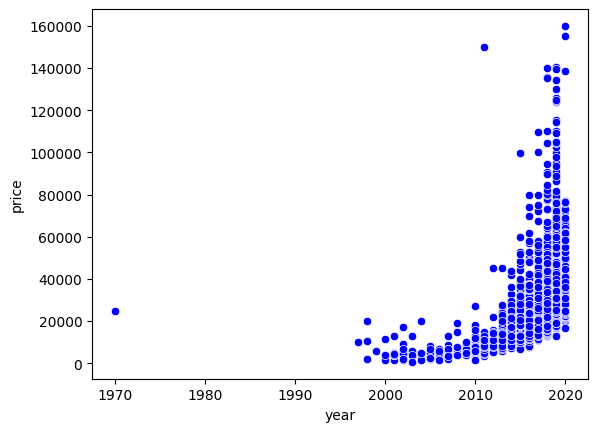

In [7]:
sns.scatterplot(x=df["year"],y=df["price"],color="b")

In [8]:
df["year"]

0        2005
1        2017
2        2016
3        2016
4        2016
         ... 
13114    2020
13115    2020
13116    2019
13117    2019
13118    2019
Name: year, Length: 13119, dtype: int64

In [9]:
df.loc[df["year"]<2000,"year"]=np.nan
df.dropna(axis=0,inplace=True)

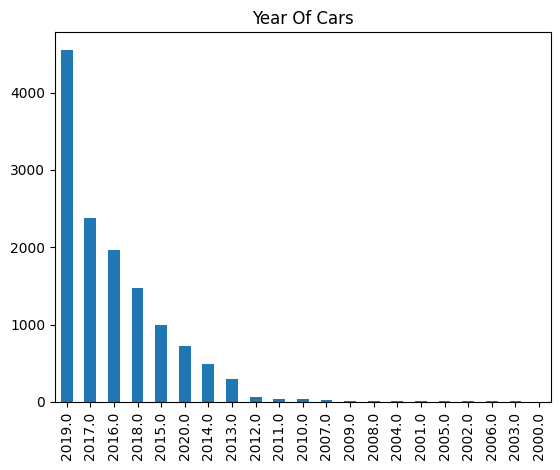

In [10]:
df["year"].value_counts().plot.bar().set_title("Year Of Cars")
plt.show()

In [11]:
#detection outlier

columns=list()
for i in df.select_dtypes("integer").columns:
   columns.append(i)

for col in columns:
  df[col]=pd.to_numeric(df[col],errors="coerce")

  max_value=df[col].std()*3+df[col].mean()
  min_value=df[col].mean()-df[col].std()*3
  
  mean=df.loc[(df[col]>min_value) & (df[col]<max_value),col].mean()
  
  if mean is np.nan:
   mean = df[col].fillna(df[col].mean(),inplace=True) 
  else:
    df.loc[(df[col]>min_value) & (df[col]<max_value),col]=mean
  
  df[col].astype("float64")

<Axes: xlabel='year', ylabel='Count'>

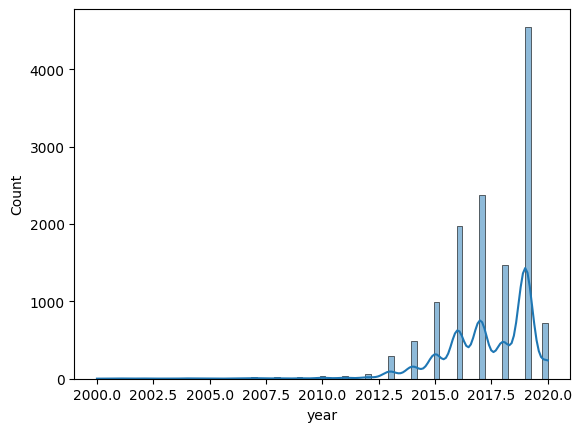

In [12]:
sns.histplot(df["year"],kde=True)

In [13]:
df["transmission"]=df["transmission"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13112 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          13112 non-null  float64 
 1   price         13112 non-null  float64 
 2   transmission  13112 non-null  category
 3   mileage       13112 non-null  float64 
 4   tax           13112 non-null  float64 
 5   mpg           13112 non-null  float64 
 6   engineSize    13112 non-null  float64 
dtypes: category(1), float64(6)
memory usage: 730.1 KB


In [14]:
encoder=LabelEncoder()
df["transmission"]=encoder.fit_transform(df["transmission"].values)
df.head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005.0,23956.157586,0,20569.633765,127.342802,32.1,1.8
1,2017.0,23956.157586,0,20569.633765,127.342802,61.4,2.1
2,2016.0,23956.157586,0,20569.633765,555.000000,28.0,5.5
3,2016.0,61948.000000,0,20569.633765,127.342802,30.4,4.0
4,2016.0,73948.000000,0,20569.633765,127.342802,30.1,4.0
5,2011.0,149948.000000,0,20569.633765,570.000000,21.4,6.2
6,2018.0,23956.157586,0,20569.633765,127.342802,47.9,2.1
7,2012.0,23956.157586,0,107000.000000,127.342802,36.7,3.5
8,2019.0,139948.000000,0,20569.633765,127.342802,21.4,4.0
9,2017.0,23956.157586,0,20569.633765,127.342802,64.2,2.1


In [15]:
pivot_table=pd.pivot_table(columns="year",values=["price","mileage","tax","mpg","engineSize","transmission"],data=df)
pivot_table

year,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
engineSize,3.200000,2.870000,3.522222,3.028571,2.530769,2.377778,2.812500,2.263636,2.662500,2.423529,...,2.450000,2.185965,2.107877,2.082485,2.184662,2.123085,2.091894,2.060259,2.016934,1.902225
mileage,73602.211255,46578.743635,29173.007791,68766.933580,80557.551448,48821.978065,70013.191882,51227.312396,56973.856493,75796.613903,...,42615.993300,36569.072863,25786.866499,23024.187249,24552.228968,21930.409878,20895.016655,20569.633765,20569.633765,20569.633765
mpg,26.333333,28.140000,27.877778,29.485714,31.838462,35.344444,34.375000,36.363636,34.343750,38.147059,...,44.207895,50.322807,54.534932,58.320570,59.272553,61.775748,59.983788,54.702999,51.015111,46.036022
price,23956.157586,23956.157586,23956.157586,23956.157586,23956.157586,23956.157586,23956.157586,23956.157586,23956.157586,23956.157586,...,27271.732386,23956.157586,23956.157586,23956.157586,24032.740676,24052.563658,24107.633459,24995.317243,25292.436923,26002.405969
tax,127.342802,171.608522,199.044402,185.244859,158.520833,149.860269,344.921401,264.324638,249.423177,189.576425,...,184.008223,142.611476,136.506991,135.426132,132.970971,129.293198,127.342802,127.342802,127.342802,127.342802
transmission,0.000000,0.100000,0.000000,0.142857,0.384615,0.000000,0.125000,0.227273,0.375000,0.058824,...,0.131579,0.087719,1.020548,1.372709,1.283552,1.507357,1.630407,1.571234,1.957610,2.279555


In [16]:
x=df["price"].values
y=df.drop("price",axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10)
len(X_train),len(Y_train),len(X_test),len(Y_test)

(9834, 9834, 3278, 3278)

In [17]:
Scaler=MinMaxScaler()
Y_train=X_train.reshape(4917,2)
Y_test=X_test.reshape(3278//2,2)
X_train=X_train.reshape(4917,2)
X_test=X_test.reshape(3278//2,2)
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

X_train.shape,X_test.shape

((4917, 2), (1639, 2))

In [18]:
Callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=25,verbose=1)

In [58]:
Model=Sequential()
Model.add(Dense(18,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(18,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(18,activation="relu"))

Model.add(Dense(units=2))

Model.compile(optimizer="adam",loss="mse")
Model.fit(x=X_train,y=Y_train,epochs=700,validation_data=(X_test,Y_test),callbacks=Callbacks)

Epoch 1/700
154/154 [==============================] - 3s 4ms/step - loss: 654828352.0000 - val_loss: 670959424.0000
Epoch 2/700
154/154 [==============================] - 0s 3ms/step - loss: 649503424.0000 - val_loss: 655515968.0000
Epoch 3/700
154/154 [==============================] - 0s 2ms/step - loss: 603582592.0000 - val_loss: 562524544.0000
Epoch 4/700
154/154 [==============================] - 1s 3ms/step - loss: 449147680.0000 - val_loss: 336289536.0000
Epoch 5/700
154/154 [==============================] - 0s 3ms/step - loss: 226943984.0000 - val_loss: 118490168.0000
Epoch 6/700
154/154 [==============================] - 0s 3ms/step - loss: 123685120.0000 - val_loss: 60809300.0000
Epoch 7/700
154/154 [==============================] - 0s 3ms/step - loss: 111704576.0000 - val_loss: 55717660.0000
Epoch 8/700
154/154 [==============================] - 0s 3ms/step - loss: 114960032.0000 - val_loss: 54065984.0000
Epoch 9/700
154/154 [==============================] - 0s 3ms/step 

In [59]:
lossdata=pd.DataFrame(Model.history.history)
X_text=X_test.reshape(3278,1)
prediction=Model.predict(X_test,verbose=0)

print(f"MSE: {mean_absolute_error(Y_test,prediction)/26224}")


MSE: 0.07471285884526659


In [60]:
NewCarSeries=df.drop("price",axis=1).iloc[1]
NewCarSeries=NewCarSeries.values
NewCarSeries=Scaler.transform(NewCarSeries.reshape(3,2))
price=df["price"].iloc[1]
print(f"Car Price : {price}")
print(f"Prediction: {np.max(Model.predict(NewCarSeries,verbose=0,callbacks=Callbacks).reshape(1,6))}")

Car Price : 23956.15758559394
Prediction: 22784.509765625
